# Exercise
**AR:** Auto-Regressive, **MA:** Moving Average

In [25]:
# Imports
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import requests
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import ccf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.holtwinters import ExponentialSmoothing
np.random.seed(0) # For reproducibility

In [26]:
def ts_plot(x,y,title,xlabel="Time",ylabel="Value"):
    plt.figure(figsize=(10,5))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

In [27]:
def acf_pacf_plot(ts,lags=30):
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plot_acf(ts, lags=lags, ax=ax[0])
    plot_pacf(ts, lags=lags, ax=ax[1])
    plt.show()

In [28]:
def mse(observations, estimates):
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = np.mean(sq_diff)
    return mse

## Exercise

- Load the two time series `arma_ts1` by running the code below.

In [30]:
# Load the first time series
response = requests.get("https://zenodo.org/records/10951538/files/arma_ts3.npz?download=1")
response.raise_for_status()
arma_ts1 = np.load(BytesIO(response.content))['signal']
print(len(arma_ts1))

479


In [29]:
response = requests.get("https://zenodo.org/records/10951538/files/arma_ts3.npz?download=1")
response.raise_for_status()
arma_ts1 = np.load(BytesIO(response.content))["signal"]

print(len(arma_ts1))


479


In [31]:
test_size = 30

train = arma_ts1[:-test_size]
test  = arma_ts1[-test_size:]


In [32]:
adf_result = adfuller(train)
print("ADF p-value:", adf_result[1])

if adf_result[1] > 0.05:
    train_stationary = np.diff(train)
    d = 1
else:
    train_stationary = train
    d = 0


ADF p-value: 0.9329054618904428


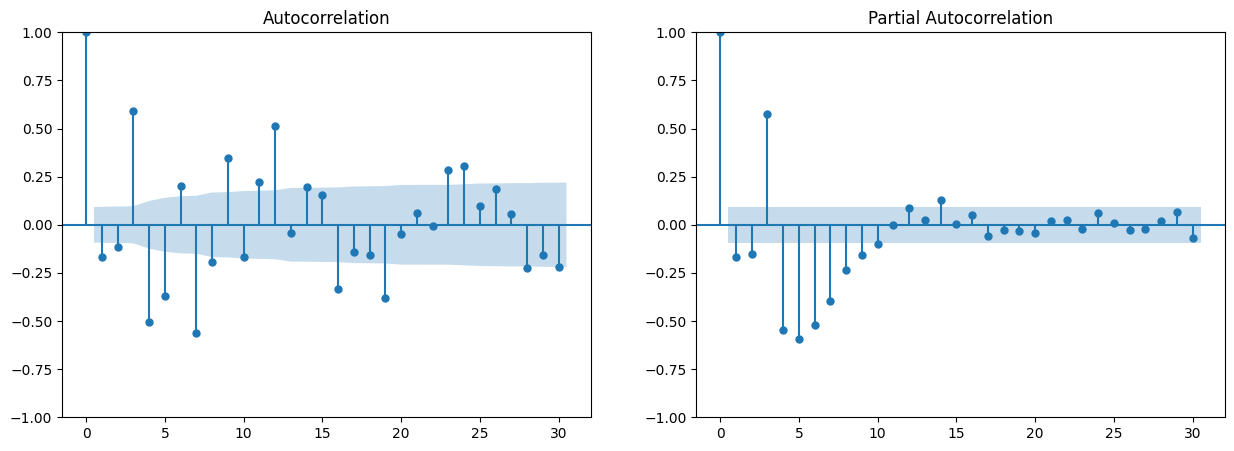

In [33]:
acf_pacf_plot(train_stationary)


In [34]:
p = 2


In [35]:
ar_model = ARIMA(train, order=(p, d, 0))
ar_fit = ar_model.fit()

ar_prediction = ar_fit.forecast(steps=test_size)

ar_mse = mse(test, ar_prediction)
print("AR MSE =", ar_mse)


AR MSE = 79.34126121739163


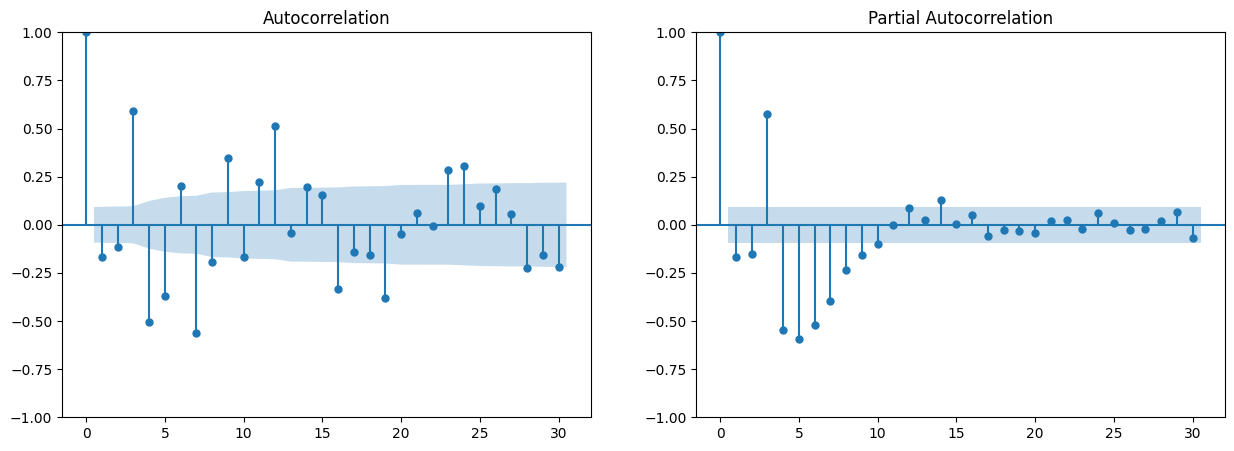

In [36]:
acf_pacf_plot(train_stationary)


In [37]:
q = 1


In [38]:
ma_model = ARIMA(train, order=(0, d, q))
ma_fit = ma_model.fit()

ma_prediction = ma_fit.forecast(steps=test_size)

ma_mse = mse(test, ma_prediction)
print("MA MSE =", ma_mse)


MA MSE = 88.62346752094278


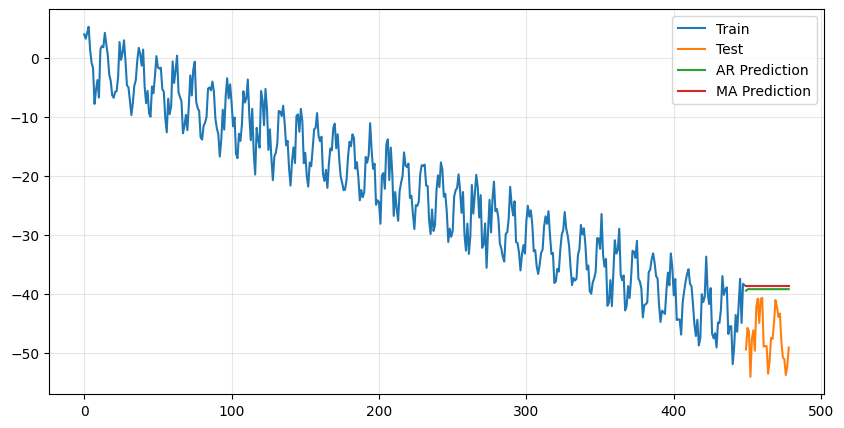

In [39]:
t = np.arange(len(arma_ts1))

plt.figure(figsize=(10,5))
plt.plot(t[:-test_size], train, label="Train")
plt.plot(t[-test_size:], test, label="Test")
plt.plot(t[-test_size:], ar_prediction, label="AR Prediction")
plt.plot(t[-test_size:], ma_prediction, label="MA Prediction")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


For each time series

1. Split the time series in train and test.
    - Use the last 30 values as test for the first time series
    - Use the last 100 as test for the second time series.
2. Make the time series stationary.
3. Determine the order $p$ of an AR model.
4. Compute the prediction of the test data with the AR($p$) model.
5. Determine the order $q$ of a MA model.
6. Compute the prediction of the test data with the MA($q$) model.